In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('C:\\Users\\SATORE ROHIT BALAJI\\Documents\\Machine Learning\\password.csv')

In [3]:
# input
x = dataset.iloc[:, [2, 3]].values
  
# output
y = dataset.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)
  
print (xtrain[0:10, :])

[[-0.91655147  0.23230404]
 [ 0.94815669 -0.84974374]
 [ 1.88051077 -0.84974374]
 [-0.91655147  1.31435183]
 [-0.91655147  0.59298664]
 [ 0.3265873  -0.84974374]
 [ 1.25894138 -0.84974374]
 [ 0.3265873  -0.84974374]
 [-0.91655147  0.95366924]
 [-0.91655147  0.23230404]]


In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [9]:
y_pred = classifier.predict(xtest)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

NameError: name 'y_pred' is not defined

In [11]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

NameError: name 'y_pred' is not defined

In [12]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


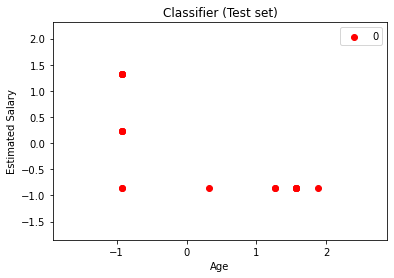

In [13]:
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
      
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()